# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [4]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [5]:
print(data.shape)
print(data.isna().count())
print(data.duplicated().count())
print(data.dtypes)

(5391, 6)
Rank                     5391
Release_Date             5391
Movie_Title              5391
USD_Production_Budget    5391
USD_Worldwide_Gross      5391
USD_Domestic_Gross       5391
dtype: int64
5391
Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [16]:
chars_to_remove = [",", "$"]
for column in ["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]:
    for char in chars_to_remove:
        data[column] = data[column].astype(str).str.replace(char, "")
    data[column] = pd.to_numeric(data[column])

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [20]:
data["Release_Date"] = pd.to_datetime(data["Release_Date"])
print(data.head())
data.info()

   Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293   1915-08-02           The Birth of a Nation                 110000   
1  5140   1916-05-09                     Intolerance                 385907   
2  5230   1916-12-24    20,000 Leagues Under the Sea                 200000   
3  5299   1920-09-17  Over the Hill to the Poorhouse                 100000   
4  5222   1925-01-01                  The Big Parade                 245000   

   USD_Worldwide_Gross  USD_Domestic_Gross  
0             11000000            10000000  
1                    0                   0  
2              8000000             8000000  
3              3000000             3000000  
4             22000000            11000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
Rank                     5391 non-null int64
Release_Date             5391 non-null datetime64[ns]
Movie_Title              5391 non-null object
USD_

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [28]:
print(f"Average production budget: {data.USD_Production_Budget.mean()}")
print(f"Average worldwide gross revenue: {data.USD_Worldwide_Gross.mean()}")
print(f"Min worldwide revenue: {data.USD_Worldwide_Gross.min()} \nMin domestice revenue: {data.USD_Domestic_Gross.min()}")
data.describe()

Average production budget: 31113737.57837136
Average worldwide gross revenue: 88855421.96271564
Min worldwide revenue: 0 
Min domestice revenue: 0


,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [32]:
print((data.USD_Domestic_Gross == 0).sum())
data[data.USD_Domestic_Gross == 0].sort_values("USD_Production_Budget", ascending=False).head()

512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [34]:
print((data.USD_Worldwide_Gross == 0).sum())
data[data.USD_Worldwide_Gross == 0].sort_values("USD_Production_Budget", ascending=False).head()

357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


### Filtering on Multiple Conditions

In [35]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [39]:
international_release_query = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
international_release_query.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [40]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [49]:
unreleased = data.loc[(data.Release_Date > scrape_date)]
print(unreleased.describe())
data_clean = data.loc[(data.Release_Date < scrape_date)]

          Rank  USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross
count     7.00                   7.00                 7.00                7.00
mean  1,070.71          89,000,000.00                 0.00                0.00
std   1,192.13          63,916,612.34                 0.00                0.00
min      96.00          15,000,000.00                 0.00                0.00
25%     223.50          35,000,000.00                 0.00                0.00
50%     366.00         100,000,000.00                 0.00                0.00
75%   1,818.00         131,500,000.00                 0.00                0.00
max   2,950.00         175,000,000.00                 0.00                0.00


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [51]:
(data.loc[(data.USD_Worldwide_Gross < data.USD_Production_Budget)].count() / data.count())*100

Rank                    37.36
Release_Date            37.36
Movie_Title             37.36
USD_Production_Budget   37.36
USD_Worldwide_Gross     37.36
USD_Domestic_Gross      37.36
dtype: float64

# Seaborn for Data Viz: Bubble Charts

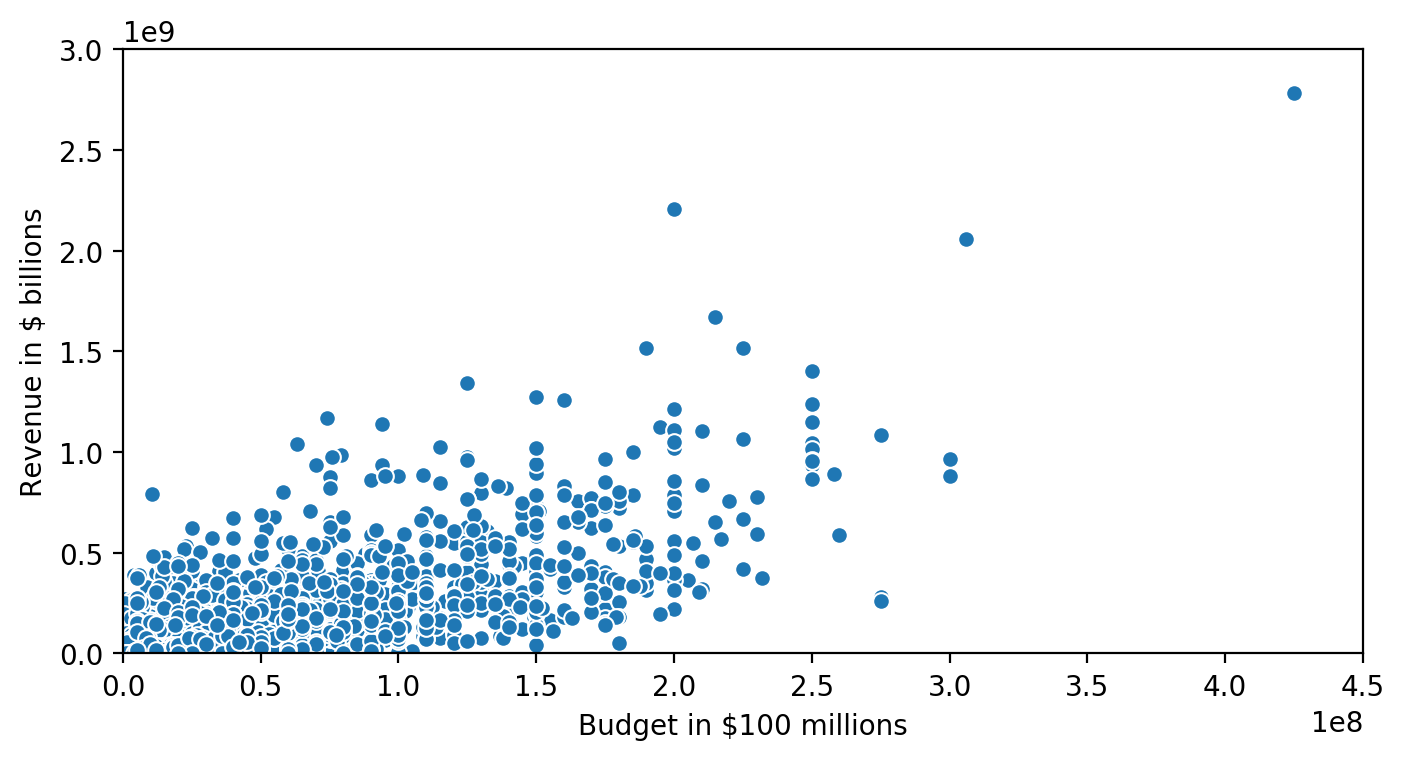

In [58]:
plt.figure(figsize=(8, 4), dpi=200)

ax = sns.scatterplot(data=data_clean, x="USD_Production_Budget", y="USD_Worldwide_Gross")

ax.set(ylim=(0, 3000000000),
      xlim=(0, 450000000),
      ylabel="Revenue in $ billions",
      xlabel="Budget in $100 millions")

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



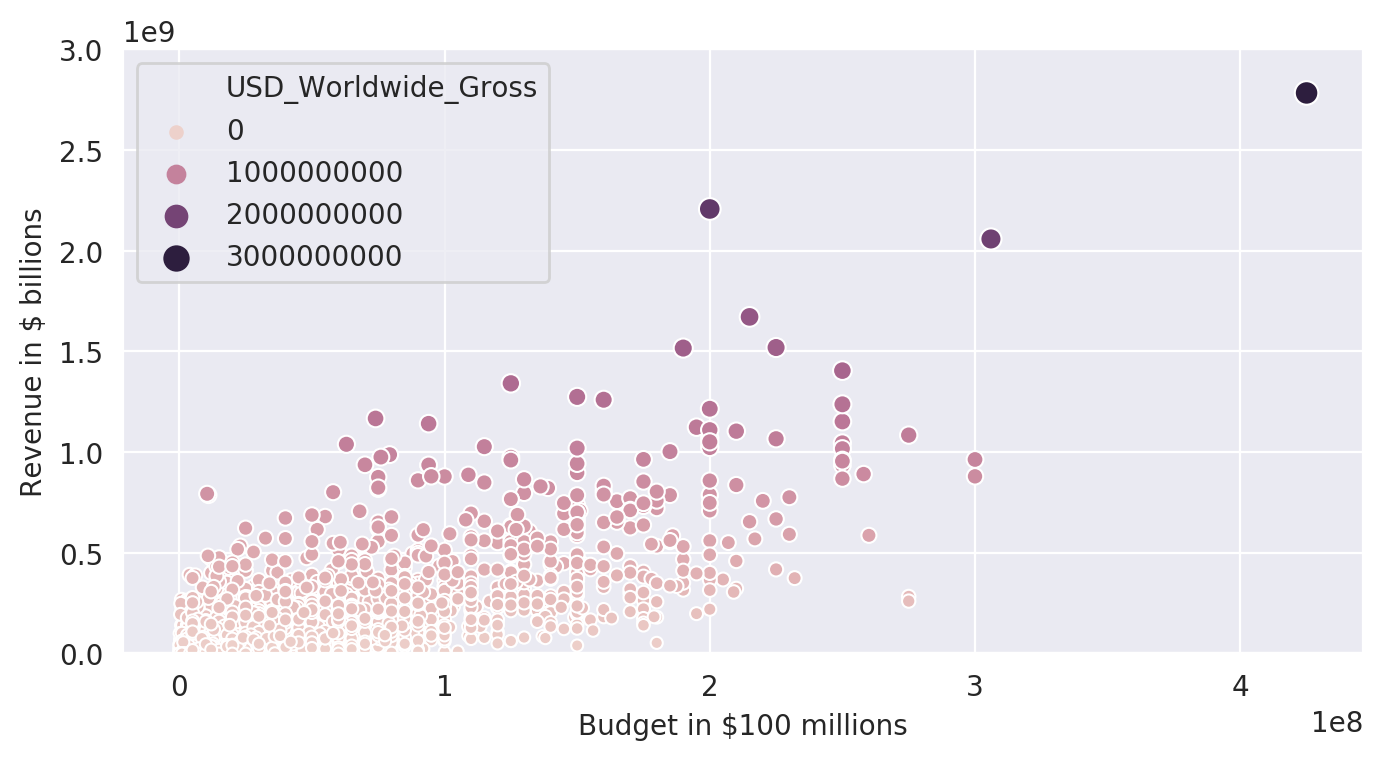

In [64]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                         x="USD_Production_Budget", 
                         y="USD_Worldwide_Gross", 
                         hue="USD_Worldwide_Gross", 
                         size="USD_Worldwide_Gross")

ax.set(ylim=(0, 3000000000),
      ylabel="Revenue in $ billions",
      xlabel="Budget in $100 millions")

plt.show()

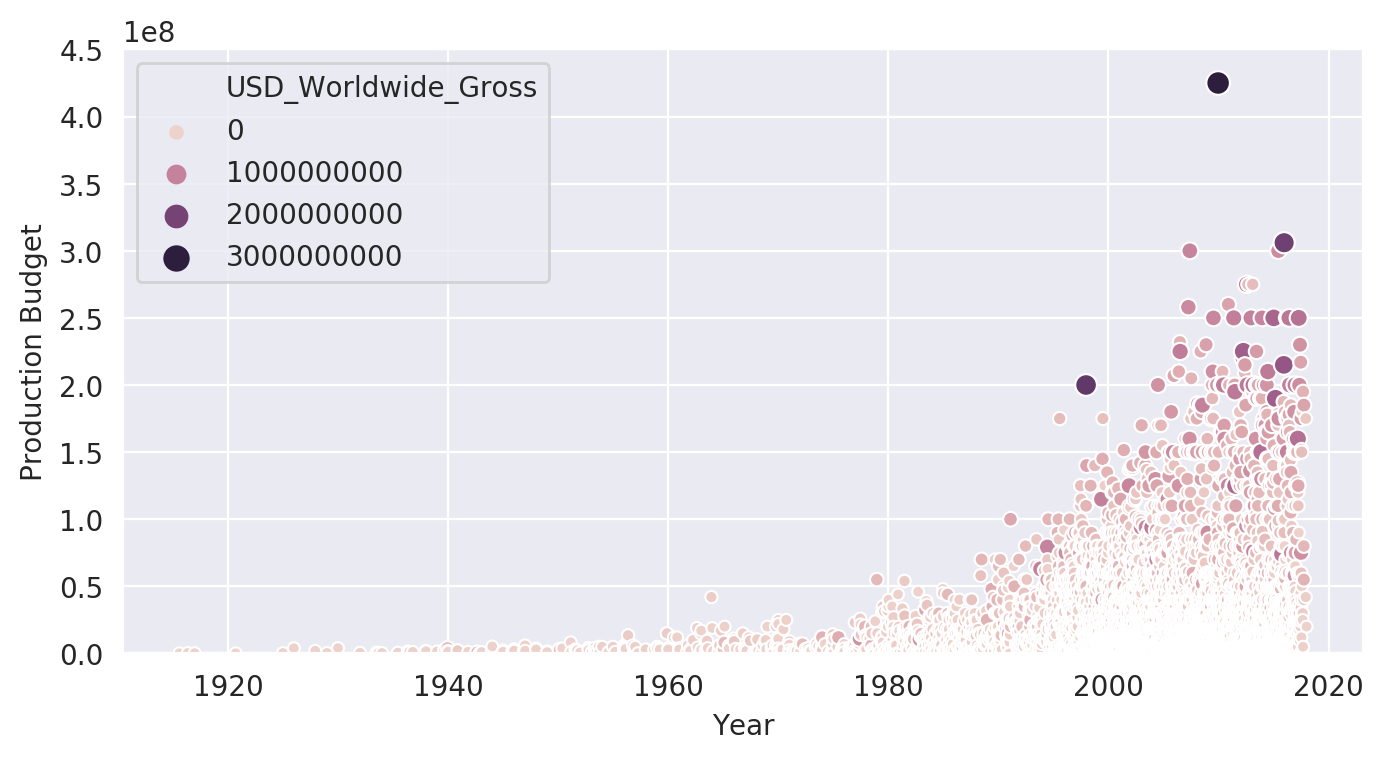

In [70]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                         x="Release_Date", 
                         y="USD_Production_Budget", 
                         hue="USD_Worldwide_Gross", 
                         size="USD_Worldwide_Gross")

ax.set(ylim=(0, 450000000),
      ylabel="Production Budget",
      xlabel="Year")

plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [128]:
pd.options.mode.chained_assignment = None 
data_clean["Decade"] = (data_clean.Release_Date.dt.year//10*10)

data_clean = data_clean.dropna()

data_clean["Decade"] = data_clean["Decade"].astype(str).str.replace(",", "")
data_clean["Decade"] = pd.to_numeric(data_clean["Decade"])

print(data_clean["Decade"])

0       1910
1       1910
2       1910
3       1920
4       1920
5       1920
6       1920
7       1920
8       1930
9       1930
10      1930
11      1930
12      1930
13      1930
14      1930
15      1930
16      1930
17      1930
18      1930
19      1930
20      1930
21      1930
22      1930
23      1930
24      1940
25      1940
26      1940
27      1940
28      1940
29      1940
        ... 
5354    2010
5355    2010
5356    2010
5357    2010
5358    2010
5359    2010
5360    2010
5361    2010
5362    2010
5363    2010
5364    2010
5365    2010
5366    2010
5367    2010
5368    2010
5369    2010
5370    2010
5371    2010
5372    2010
5373    2010
5374    2010
5375    2010
5376    2010
5377    2010
5378    2010
5379    2010
5380    2010
5381    2010
5382    2010
5383    2010
Name: Decade, Length: 5384, dtype: int64


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [133]:
old_films = data_clean.loc[data_clean["Decade"] <= 1970]
new_films = data_clean.loc[data_clean["Decade"] > 1970]

print(old_films.describe())
new_films.describe()

          Rank  USD_Production_Budget  USD_Worldwide_Gross  \
count   262.00                 262.00               262.00   
mean  4,073.13           6,304,420.87        47,318,940.28   
std     895.72           7,687,324.59        86,847,816.03   
min     912.00              25,000.00                 0.00   
25%   3,595.00           1,519,250.00         6,850,000.00   
50%   4,290.00           3,450,000.00        15,100,000.00   
75%   4,710.25           8,150,000.00        43,525,000.00   
max   5,356.00          55,000,000.00       786,598,007.00   

       USD_Domestic_Gross   Decade  
count              262.00   262.00  
mean        32,734,854.83 1,957.82  
std         49,419,329.25    14.15  
min                  0.00 1,910.00  
25%          6,600,000.00 1,950.00  
50%         13,740,000.00 1,960.00  
75%         37,088,581.50 1,970.00  
max        460,998,007.00 1,970.00  


,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,"5,122.00","5,122.00","5,122.00","5,122.00","5,122.00"
mean,"2,627.78","32,303,670.64","91,101,526.25","41,726,699.21","2,000.83"
std,"1,549.76","41,026,266.68","171,406,401.64","66,769,429.69",8.60
min,1.00,"1,100.00",0.00,0.00,"1,980.00"
25%,"1,288.25","5,500,000.00","3,618,183.25","1,186,720.00","2,000.00"
50%,"2,589.50","18,000,000.00","28,612,667.00","17,328,068.50","2,000.00"
75%,"3,938.75","40,000,000.00","99,003,897.75","53,301,948.50","2,010.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00","2,010.00"


# Seaborn Regression Plots

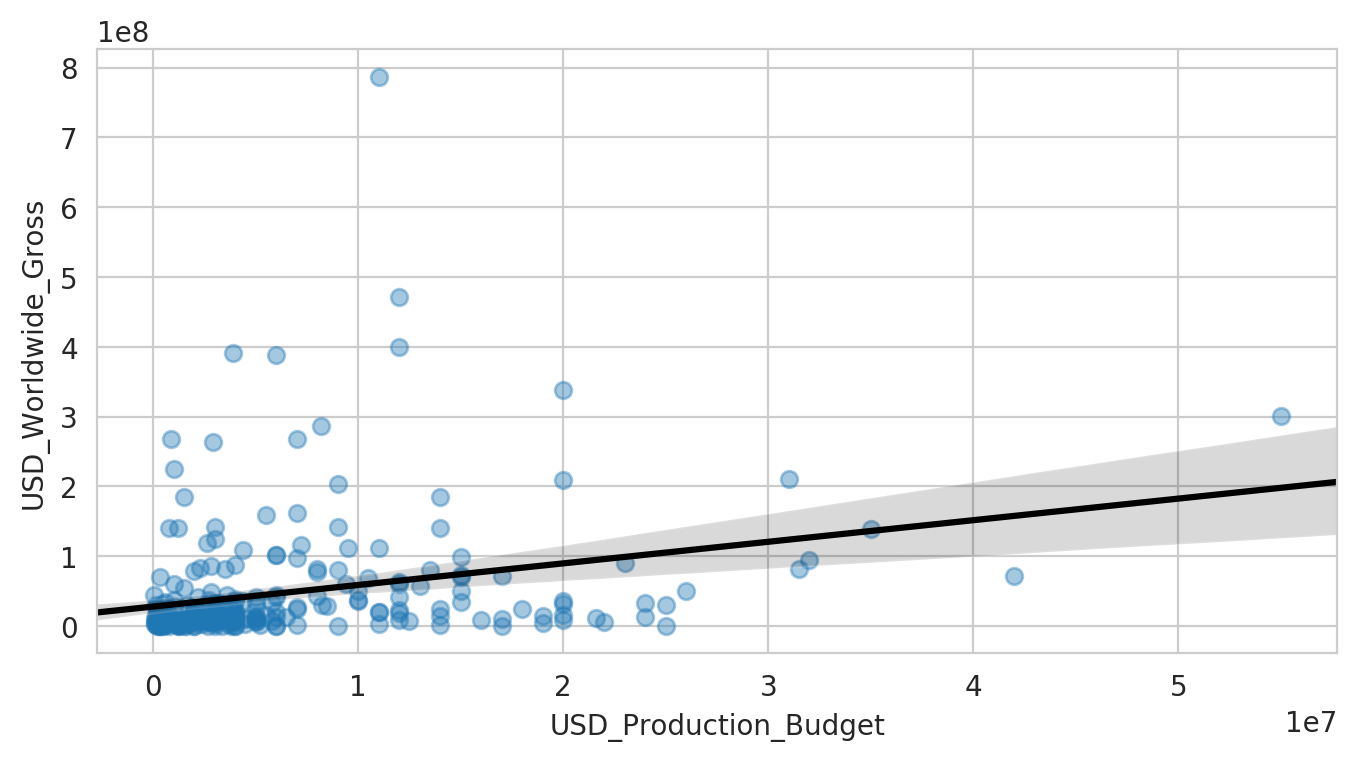

In [136]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=old_films,
                x="USD_Production_Budget",
                y="USD_Worldwide_Gross",
                scatter_kws={"alpha": 0.4},
                line_kws={"color": "black"})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

[(0, 3000000000),
 Text(0, 0.5, 'Revenue in $ billions'),
 (0, 450000000),
 Text(0.5, 0, 'Budget in $100 millions')]

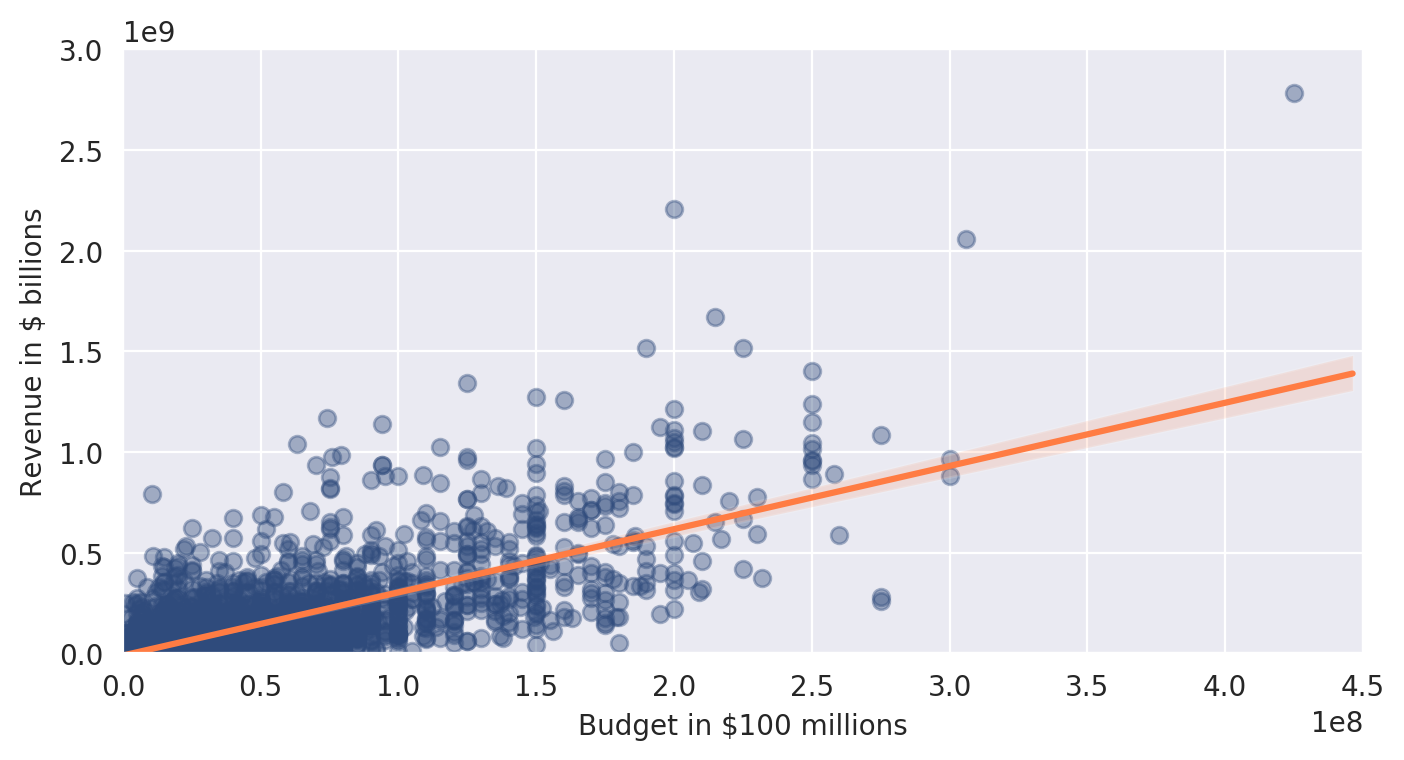

In [141]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    ax = sns.regplot(data=new_films,
                x="USD_Production_Budget",
                y="USD_Worldwide_Gross", 
                color="#2f4b7c",
                scatter_kws={"alpha": 0.4},
                line_kws={"color": "#ff7c43"})
    
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions') 

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [149]:
regression = LinearRegression()
X = pd.DataFrame(new_films, columns=["USD_Production_Budget"])
y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])
regression.fit(X, y)
print(regression.intercept_)
print(regression.coef_)
print(regression.score(X, y))

[-10278584.79397982]
[[3.13834648]]
0.564250171393927


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [150]:
regression = LinearRegression()
X = pd.DataFrame(old_films, columns=["USD_Production_Budget"])
y = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])
regression.fit(X, y)
print(regression.intercept_)
print(regression.coef_)
print(regression.score(X, y))

[27818062.76534171]
[[3.0932068]]
0.074963619374521


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 